In [70]:
import gc
import scipy.io as sio
import scipy.fft as sfft
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [71]:
path = '../datasets/B101/'
files = os.listdir(path)
files = [file for file in files if file.endswith('_trimmed.mat')]

In [72]:
dataSet = {}
for file in files:
    fileName = os.path.basename(file)
    fileName = fileName.split('.')[0]
    fileName = fileName.removeprefix('Channel')
    fileName = fileName.removesuffix('_trimmed')
    dataSet[fileName] = sio.loadmat(path + file)

In [73]:
dataSet['1']['trimmedMatrix'][0]

array([-21702628. ,  -8657071. ,   7671702. , ...,   8025217. ,
         5740304. ,   5312691.5], dtype=float32)

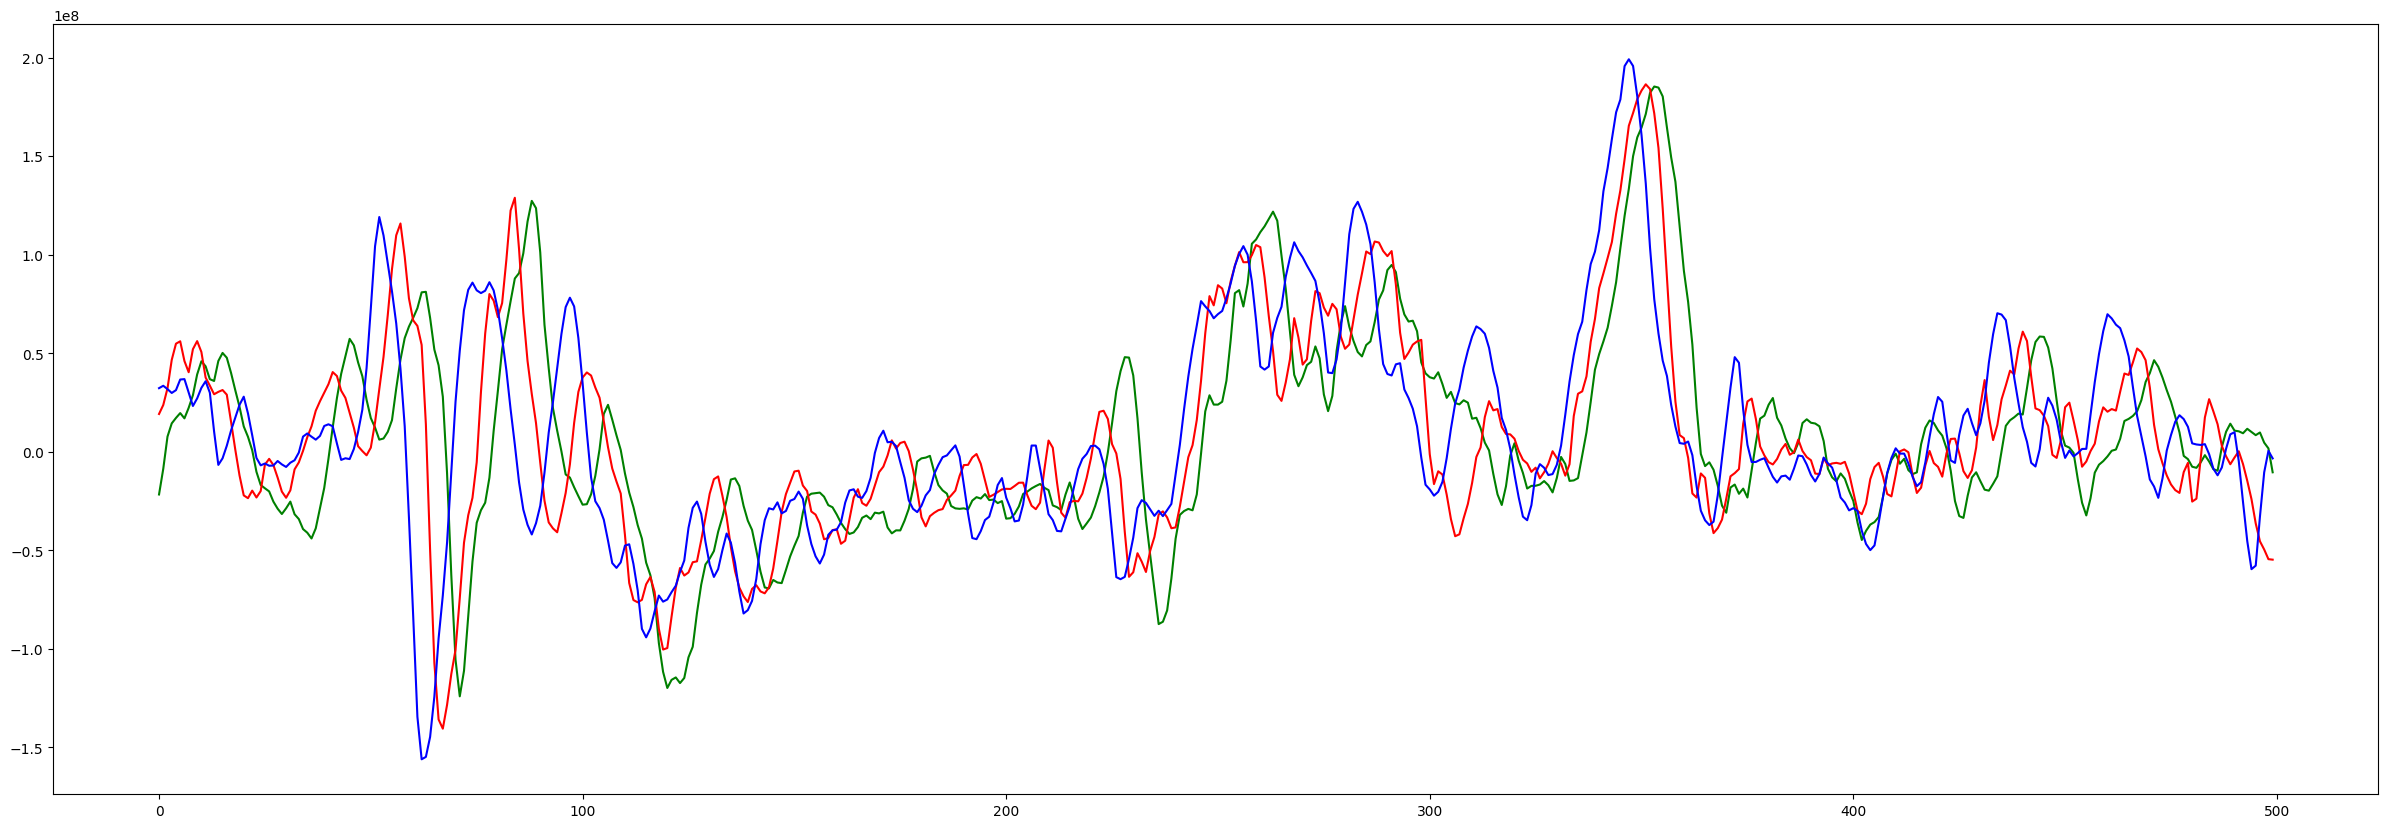

In [74]:
#Plot the first channel
plt.figure(figsize=(30,10))
plt.plot(dataSet['1']['trimmedMatrix'][0][:500], 'g')
plt.plot(dataSet['2']['trimmedMatrix'][0][:500], 'r')
plt.plot(dataSet['3']['trimmedMatrix'][0][:500], 'b')
#plt.plot(dataSet['4']['trimmedMatrix'][0][:500], 'c')
#plt.plot(dataSet['39']['trimmedMatrix'][0][:500],'y')
plt.show()

In [77]:
for delta1 in range(10):
    delta2 = delta1*2
    #calculate correlation between 3 channels
    corr1 = np.corrcoef(dataSet['3']['trimmedMatrix'][0][0:500], dataSet['2']['trimmedMatrix'][0][delta1:(500+delta1)])
    corr2 = np.corrcoef(dataSet['3']['trimmedMatrix'][0][0:500], dataSet['1']['trimmedMatrix'][0][delta2:(500+delta2)])
    corr3 = np.corrcoef(dataSet['2']['trimmedMatrix'][0][delta1:(500+delta1)], dataSet['1']['trimmedMatrix'][0][delta2:(500+delta2)])
    print(f'delta1: {delta1}, delta2: {delta2}, corr1: {corr1[0][1]}, corr2: {corr2[0][1]}, corr3: {corr3[0][1]}')

delta1: 0, delta2: 0, corr1: 0.7026876634053255, corr2: 0.4436442577615478, corr3: 0.720945424805088
delta1: 1, delta2: 2, corr1: 0.787154931695355, corr2: 0.5548641787846039, corr3: 0.7958573524209767
delta1: 2, delta2: 4, corr1: 0.8610582657119329, corr2: 0.6874197173550685, corr3: 0.85913635692579
delta1: 3, delta2: 6, corr1: 0.9150148612997367, corr2: 0.8089759488247664, corr3: 0.9075574836380926
delta1: 4, delta2: 8, corr1: 0.9397091202492953, corr2: 0.8714847071432373, corr3: 0.9356322553885539
delta1: 5, delta2: 10, corr1: 0.9294880222569265, corr2: 0.8417106397052275, corr3: 0.9362400109636264
delta1: 6, delta2: 12, corr1: 0.885309295782225, corr2: 0.7224175888370694, corr3: 0.9062157857991712
delta1: 7, delta2: 14, corr1: 0.8162690302035616, corr2: 0.5651894363375314, corr3: 0.8487772948902906
delta1: 8, delta2: 16, corr1: 0.7335938800940852, corr2: 0.40906763084783454, corr3: 0.7749299352848744
delta1: 9, delta2: 18, corr1: 0.6468502847397158, corr2: 0.26151565682459504, corr

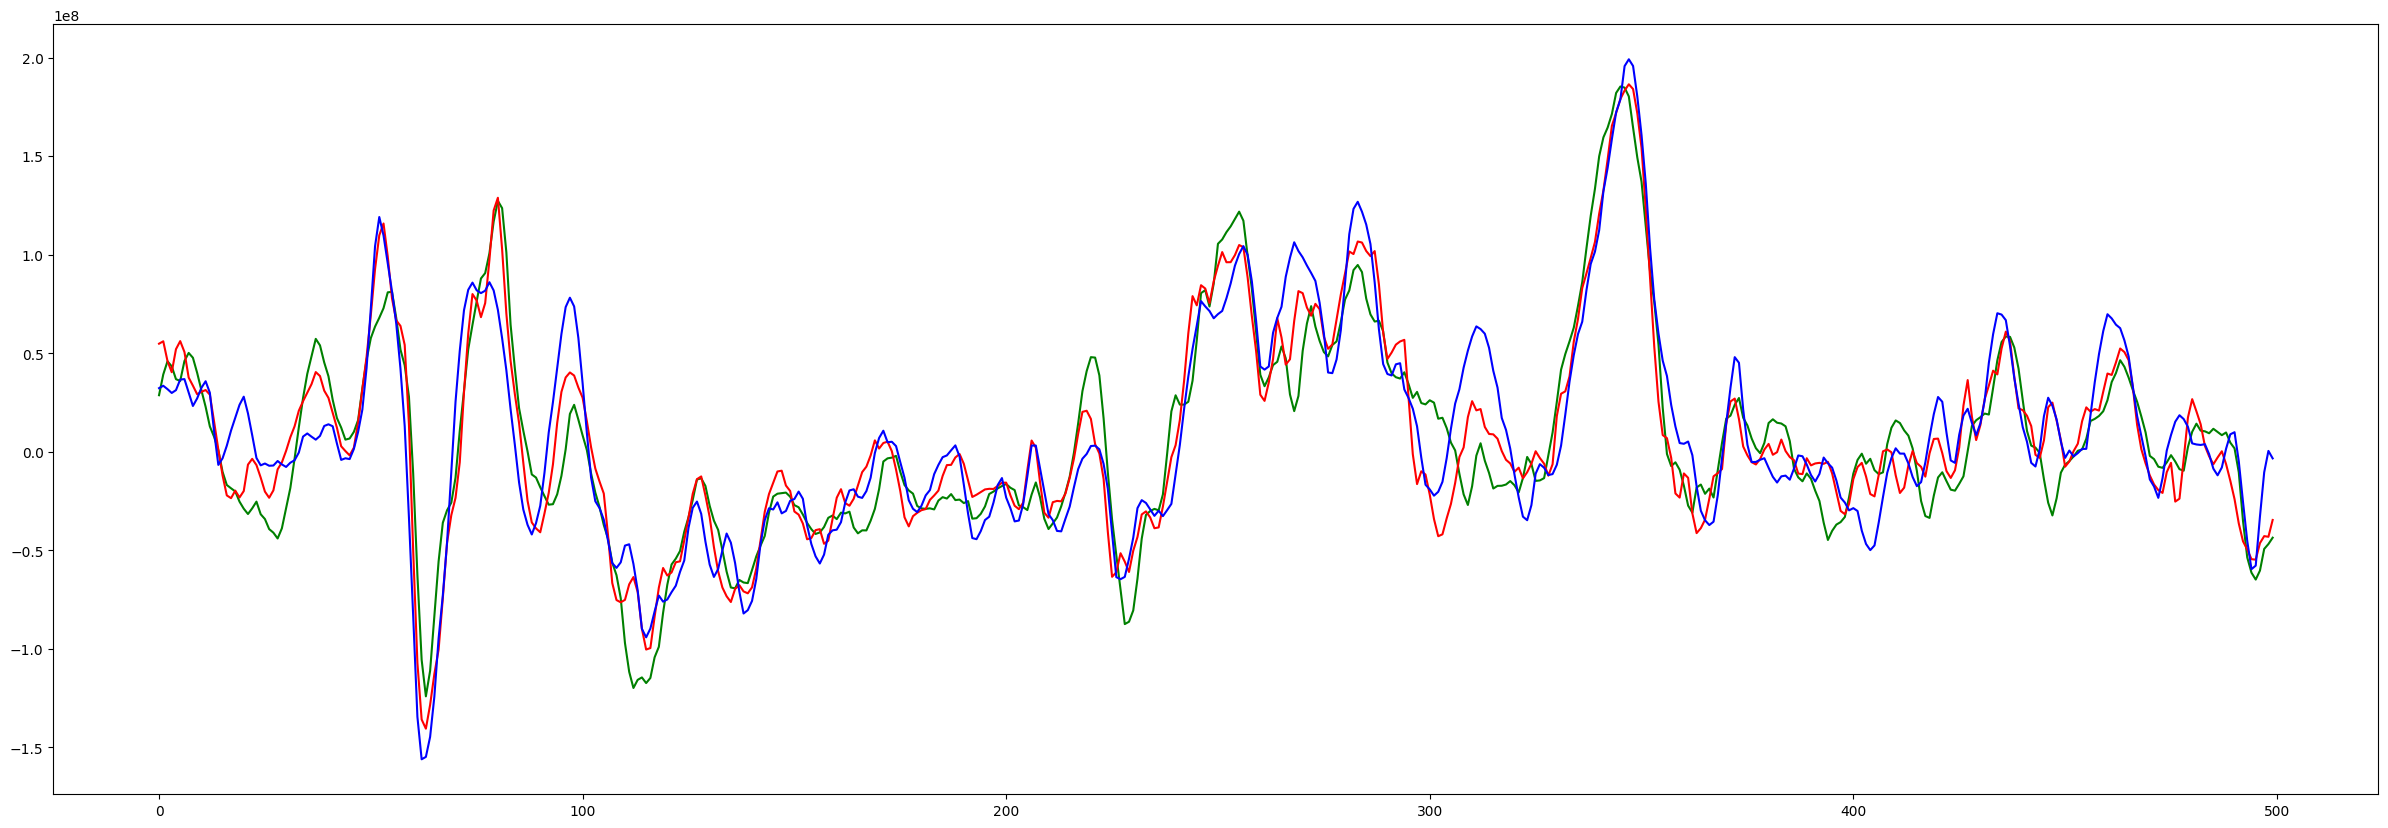

In [76]:
delta1 = 4
delta2 = delta1*2
plt.figure(figsize=(30,10))
plt.plot(dataSet['1']['trimmedMatrix'][0][delta2:(500+delta2)], 'g')
plt.plot(dataSet['2']['trimmedMatrix'][0][delta1:(500+delta1)], 'r')
plt.plot(dataSet['3']['trimmedMatrix'][0][0:500], 'b')
plt.show()